# Rating on Google play  store Apps

## Environment 

In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.7":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.7":
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.18.5", 'matplotlib': "3.2.2",'sklearn': "0.23.1", 
                'pandas': "1.0.5",'xgboost': "1.1.1", 'shap': "0.35.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:37:09) 
[Clang 10.0.1 ]

[ OK ] numpy version 1.18.5 is installed.
[ OK ] matplotlib version 3.2.2 is installed.
[ OK ] sklearn version 0.23.1 is installed.
[ OK ] pandas version 1.0.5 is installed.
[ OK ] xgboost version 1.1.1 is installed.
[ OK ] shap version 0.35.0 is installed.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import matplotlib as mpl
import sklearn
from datetime import datetime, date
import datetime

In [3]:
mpl.rcParams['savefig.dpi'] = 500

In [4]:
df = pd.read_csv('/Users/xiongfengwang/git/data1030_student_f20/project/data/googleplaystore.csv')
print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## Introduction

1. What is the target variable
2. Is the problem regression or classification?
3. Why is this interesting/important?
4. Number of data points and number of features.
5. If dataset is not well-documented, write a description for each feature (if feature is categorical, describe each category; if feature is numerical, include the unit of the quantity and what it measures)
6. If the dataset is from Kaggle/UCI/already described, write a short description about 2-3 public projects or publications where the data has been used, what did the authors find, what ML question did they solve and how successful they were.

This project will perform a supervised machine learning process on the Google play store Apps dataset using rating as the target variable. This is a regression problem considering that the rating scales from 1 to 5, decile between integers.<br/>
This is an interesting task because it allows us to predict the rating of an App with certain features. For the existing Apps, comparing the prediction result with the true value can assist in finding outliers with speciality. For recently developed Apps, a precise prediction result reveals the feedback in the future which saves the value of time, or at least, gives people a hint about the App's customer experience.

App: Key, the name of the App<br/>
Category: Categorical, which category the App falls into<br/>
Reviews: Numerical, number of reviews<br/>
Size: Numerical, size of the App<br/>
Installs: Categorical, scale for number of installs<br/>
Type: Categorical, whether the App is free or paid to use<br/>
Price: Numerical, price of the App<br/>
Content Rating: Categorical, rating on who can use the App<br/>
Genres: Categorical, which category & subcategory the App falls into<br/>
Last Updated: Numerical, App's last updated date in Month DD, YYYY<br/>
Current Ver: Categorical, current verison of the App<br/>
Android Ver: Categorical, Android version that supports the App<br/>
Rating: Regression Target, the rating for the App<br/>

There are plenty of public projects on this dataset, mostly focusing on EDA, data visualization, machine learning on rating prediction and data analysis. The top voted notebook analysed almost every column of the dataset except for the version ones and discussed some relationship between certain columns, for example, Users prefer to pay for apps that are light-weighted. The notebook's conclusion is neat but market-related practical. A trending notebook series plots the data with different plotting packages but just like most other visualizations, author discussed the relationship between rating and one feature individually. The top voted machine learning notebook provides integer encoding RFR model, dummy encoding SVR model and random forest regressor model but cannot conclude which model has the best predictive.

## Exploratory Data Analysis

1. Perform a thorough EDA on each column in your dataset and pay special attention to your target variable
2. Use .describe or .value_counts, create histograms or bar plots as appropriate
3. Create other type of figures using two columns
4. Create a scatter matrix
5. There is no need to include everything in the report.
6. Choose at least three but maximum five figures that you think are interesting or important and one of those figures should show the target variable. Do not include three figures of the same type (e.g., you’ll lose points if you submit three bar plots). Use at least two figure types.
7. Write a figure caption for each figure.
8. Make sure your figures are publication-quality figures. Please print out your report before you submit it and make sure the figures are readable, the font size is similar to the text font size, axes are labelled, the figures have sufficient resolution (usually 300 dpi).

In [5]:
# drop completely duplicated rows
df1 = df.drop_duplicates()
df1.shape

(10358, 13)

In [6]:
# drop column with no target variable rating
df1 = df1.dropna(subset = ['Rating'])

In [7]:
# drop column with Nan
# df1.dropna(inplace = True)

In [8]:
# reset index
df1 = df1.reset_index(drop=True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8893 entries, 0 to 8892
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8893 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8893 non-null   float64
 3   Reviews         8893 non-null   int64  
 4   Size            8893 non-null   object 
 5   Installs        8893 non-null   object 
 6   Type            8893 non-null   object 
 7   Price           8893 non-null   object 
 8   Content Rating  8893 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8893 non-null   object 
 11  Current Ver     8889 non-null   object 
 12  Android Ver     8891 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 903.3+ KB


### data modify log
data sample 10474's column replacement is wrong, I modified it by hand.

#### Catogery 

In [10]:
df1.Category.value_counts()

FAMILY                 1718
GAME                   1074
TOOLS                   734
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         310
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

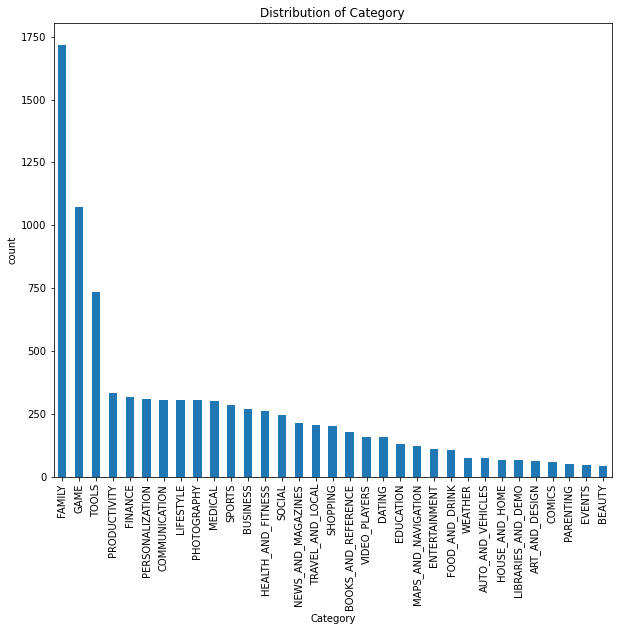

In [61]:
plt.figure(figsize=(10, 10))
pd.value_counts(df1.Category).plot.bar(title = 'Distribution of Category')
plt.gcf().subplots_adjust(bottom=0.25)
plt.xlabel('Category')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Category.png', inches = 'tight')

#### Reviews

In [12]:
df1.Reviews.describe()

count    8.893000e+03
mean     4.727232e+05
std      2.904893e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.710000e+03
75%      7.126600e+04
max      7.815831e+07
Name: Reviews, dtype: float64

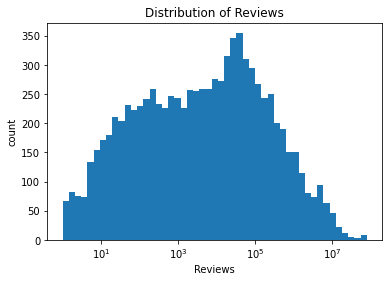

In [13]:
df1.Reviews.plot.hist(bins = np.logspace(np.log10(1),np.log10(np.max(df1.Reviews)),50))
plt.title('Distribution of Reviews')
plt.semilogx()
plt.xlabel('Reviews')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Reviews.png')

#### Size

In [14]:
df1.Size = df1.Size.replace('Varies with device', np.nan)

In [15]:
df1.Size = df1.Size.str.replace('k','e+3')
df1.Size = df1.Size.str.replace('M','e+6')

In [16]:
df1.Size = pd.to_numeric(df1.Size)
df1.Size.describe()

count    7.425000e+03
mean     2.274496e+07
std      2.343433e+07
min      8.500000e+03
25%      5.100000e+06
50%      1.400000e+07
75%      3.300000e+07
max      1.000000e+08
Name: Size, dtype: float64

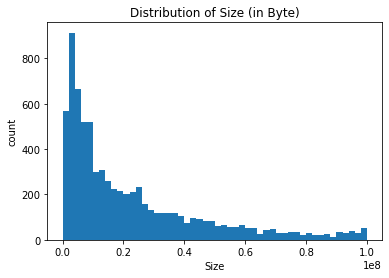

In [17]:
df1.Size.plot.hist(bins = 50)
plt.title('Distribution of Size (in Byte)')
plt.xlabel('Size')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Size.png')

#### Installs

In [18]:
df1.Installs.value_counts()

1,000,000+        1486
10,000,000+       1132
100,000+          1110
10,000+            989
1,000+             699
5,000,000+         683
500,000+           516
50,000+            462
5,000+             426
100,000,000+       369
100+               303
50,000,000+        272
500+               199
10+                 69
500,000,000+        61
50+                 56
1,000,000,000+      49
5+                   9
1+                   3
Name: Installs, dtype: int64

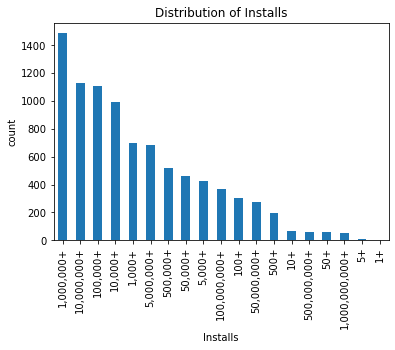

In [19]:
pd.value_counts(df1.Installs).plot.bar(title = 'Distribution of Installs')
plt.xlabel('Installs')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Installs.png')

#### Type

In [20]:
df1.Type.value_counts()

Free    8280
Paid     613
Name: Type, dtype: int64

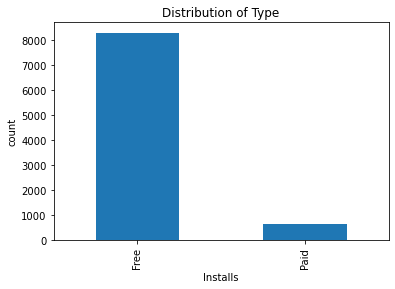

In [21]:
pd.value_counts(df1.Type).plot.bar(title = 'Distribution of Type')
plt.xlabel('Installs')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Type.png')

#### Price

In [22]:
df1.Price = df1.Price.str.replace('$','')

In [23]:
df1.Price = pd.to_numeric(df1.Price)

In [24]:
df1.Price.describe()

count    8893.000000
mean        0.963046
std        16.188434
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

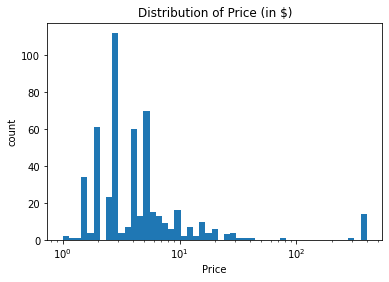

In [25]:
df1.Price.plot.hist(bins = np.logspace(np.log10(1),np.log10(np.max(df1.Price)),50))
plt.title('Distribution of Price (in $)')
plt.semilogx()
plt.xlabel('Price')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Price.png')

#### Content Rating

In [26]:
df1['Content Rating'].value_counts()

Everyone           7096
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

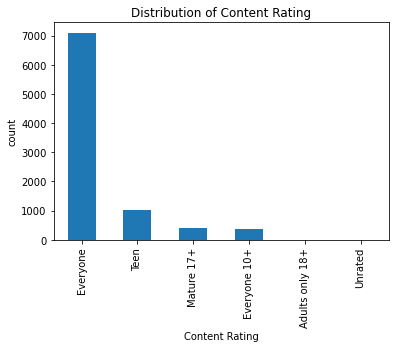

In [27]:
pd.value_counts(df1['Content Rating']).plot.bar(title = 'Distribution of Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Content Rating.png')

#### Genres
Data in thie feature looks good but is hard to plot
##### @Todo
For this feature I'm considering take the subcategory apart

In [28]:
df1.Genres.value_counts()

Tools                          733
Entertainment                  498
Education                      446
Action                         349
Productivity                   334
                              ... 
Lifestyle;Education              1
Music & Audio;Music & Video      1
Health & Fitness;Education       1
Puzzle;Education                 1
Arcade;Pretend Play              1
Name: Genres, Length: 115, dtype: int64

In [29]:
df1['Subcategory'] = df1.Genres.str.split(';').str[1]

In [30]:
grouped_category = df1.groupby(['Category','Subcategory']);

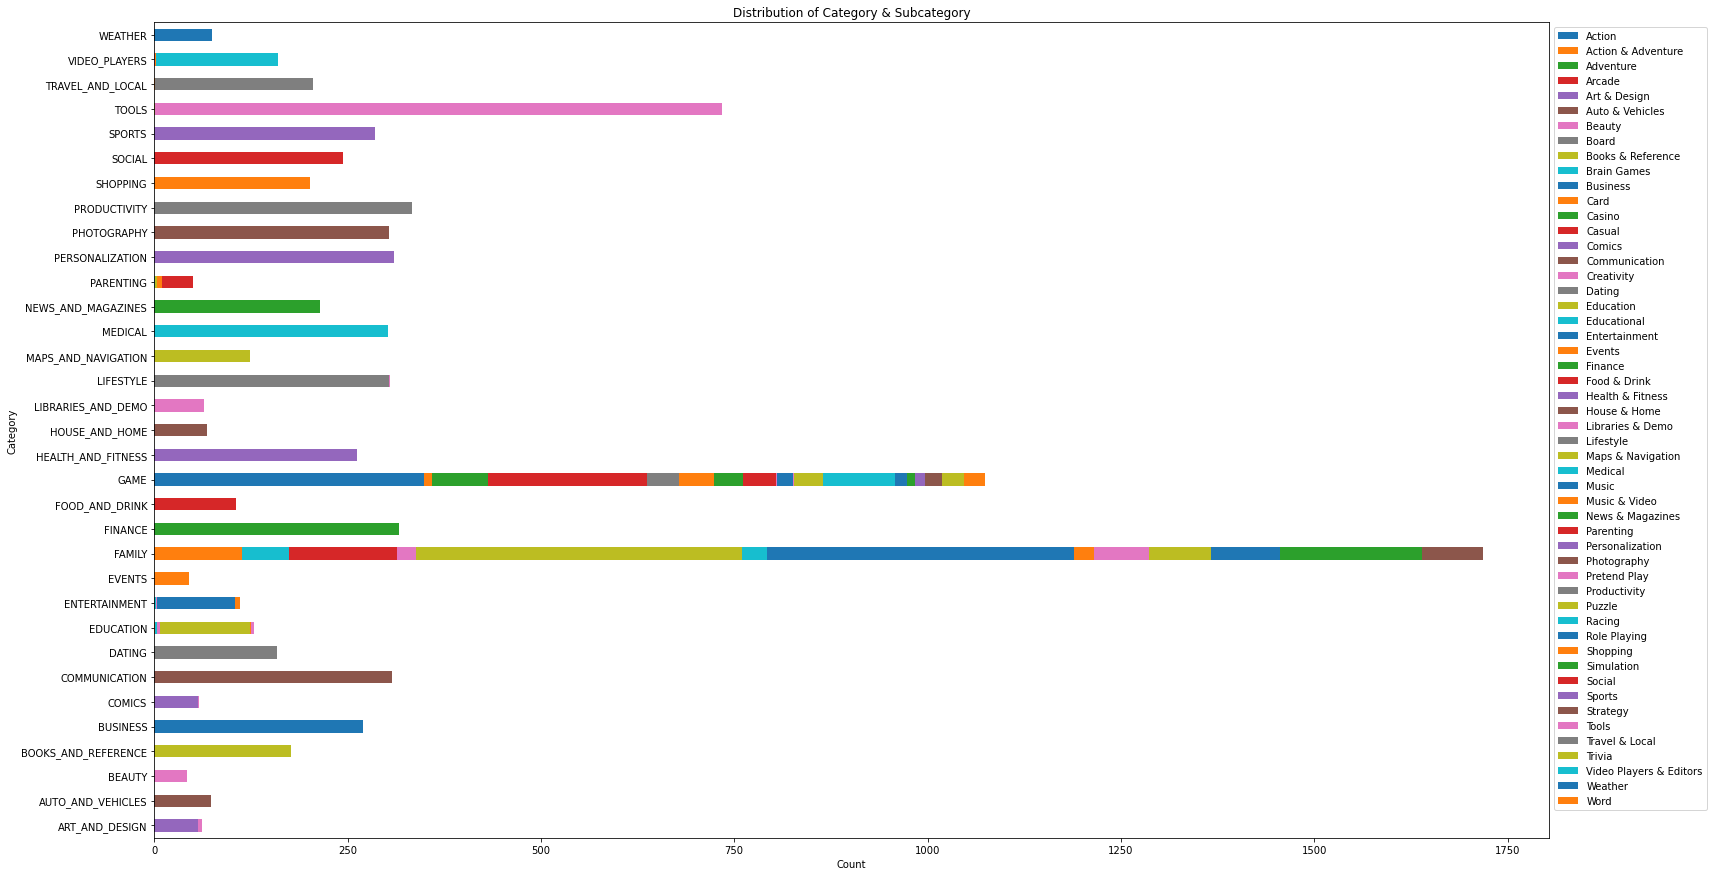

In [31]:
twowaytable = pd.crosstab(index = df1.Category,\
                          columns = df1.Genres.str.split(';').str[-1])
twowaytable.plot(kind = "barh", figsize = (25, 15), stacked = True)
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.xlabel('Count')
plt.title('Distribution of Category & Subcategory')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Category & Subcategory.png')

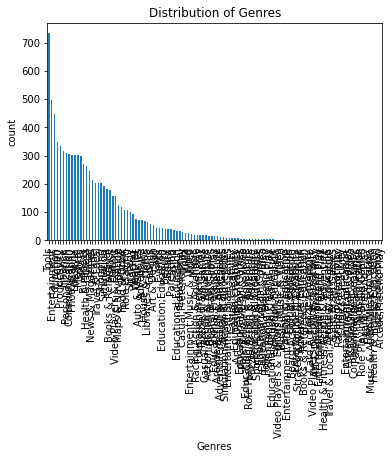

In [32]:
# This is just to show we cannot plot Genres directly
pd.value_counts(df1.Genres).plot.bar(title = 'Distribution of Genres');
plt.xlabel('Genres');
plt.ylabel('count');

#### Last Updated
##### @Todo
For this feature I'm considering take the Month apart as a new feature

In [33]:
(datetime.datetime.strptime('2019-02-03', '%Y-%m-%d')- pd.to_datetime(df1['Last Updated']))[24].days;

In [34]:
datetime_confuse = datetime.datetime.strptime('2019-02-03', '%Y-%m-%d') - pd.to_datetime(df1['Last Updated'])
df1['Days'] = ''
for i in range(len(df1['Last Updated'])):
    df1['Days'][i] = pd.to_numeric(datetime_confuse[i].days)
df1.Days = pd.to_numeric(df1.Days)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
df1.Days.describe()

count    8893.000000
mean      438.109299
std       401.258049
min       179.000000
25%       195.000000
50%       251.000000
75%       500.000000
max      3180.000000
Name: Days, dtype: float64

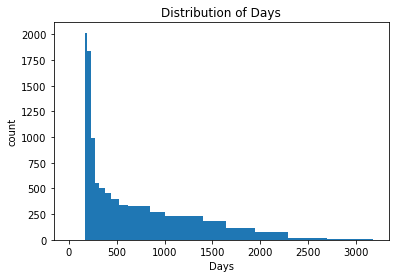

In [36]:
df1.Days.plot.hist(bins = np.logspace(np.log10(1),np.log10(np.max(df1.Days)),50))
plt.title('Distribution of Days')
plt.xlabel('Days')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Days.png')

#### Current Ver
##### @Pass

#### Android Ver
##### @Todo
Small amount of samples show different format, decide whether to modify it.

In [37]:
df1['Android Ver'].value_counts()

4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1095
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             331
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

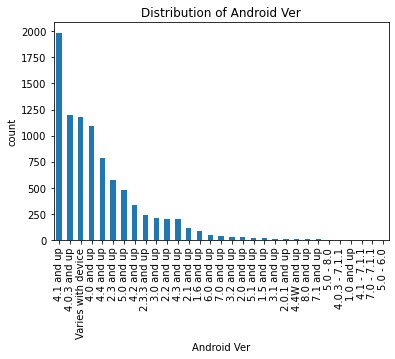

In [38]:
pd.value_counts(df1['Android Ver']).plot.bar(title = 'Distribution of Android Ver')
plt.xlabel('Android Ver')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Android Ver.png')

#### Rating

In [39]:
df1.Rating.value_counts();

In [40]:
df1.Rating.describe()

count    8893.000000
mean        4.187619
std         0.522910
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [41]:
len(df1.Rating.unique())

39

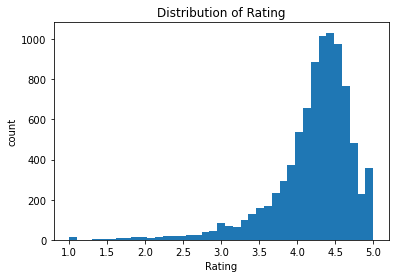

In [42]:
df1.Rating.plot.hist(bins = 39)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Distribution of Rating.png')

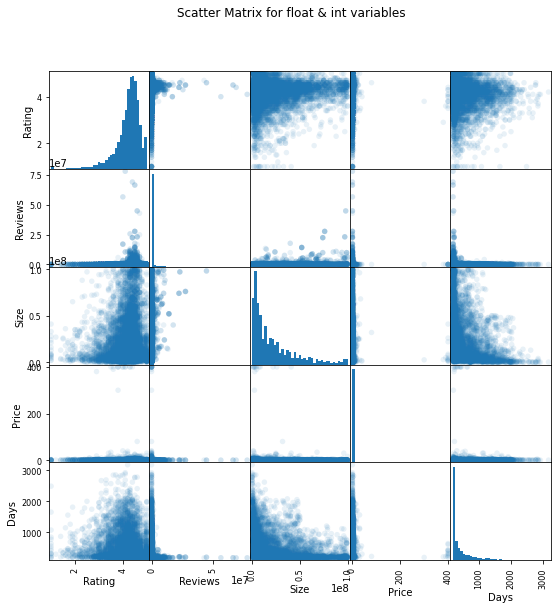

In [43]:
pd.plotting.scatter_matrix(df1.select_dtypes([float, int]), figsize = (9, 9), marker = 'o',
                           hist_kwds = {'bins': 39}, s = 30, alpha = .1)
plt.suptitle('Scatter Matrix for float & int variables')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Scatter Matrix.png')

invalid value encountered in greater_equal
invalid value encountered in less_equal


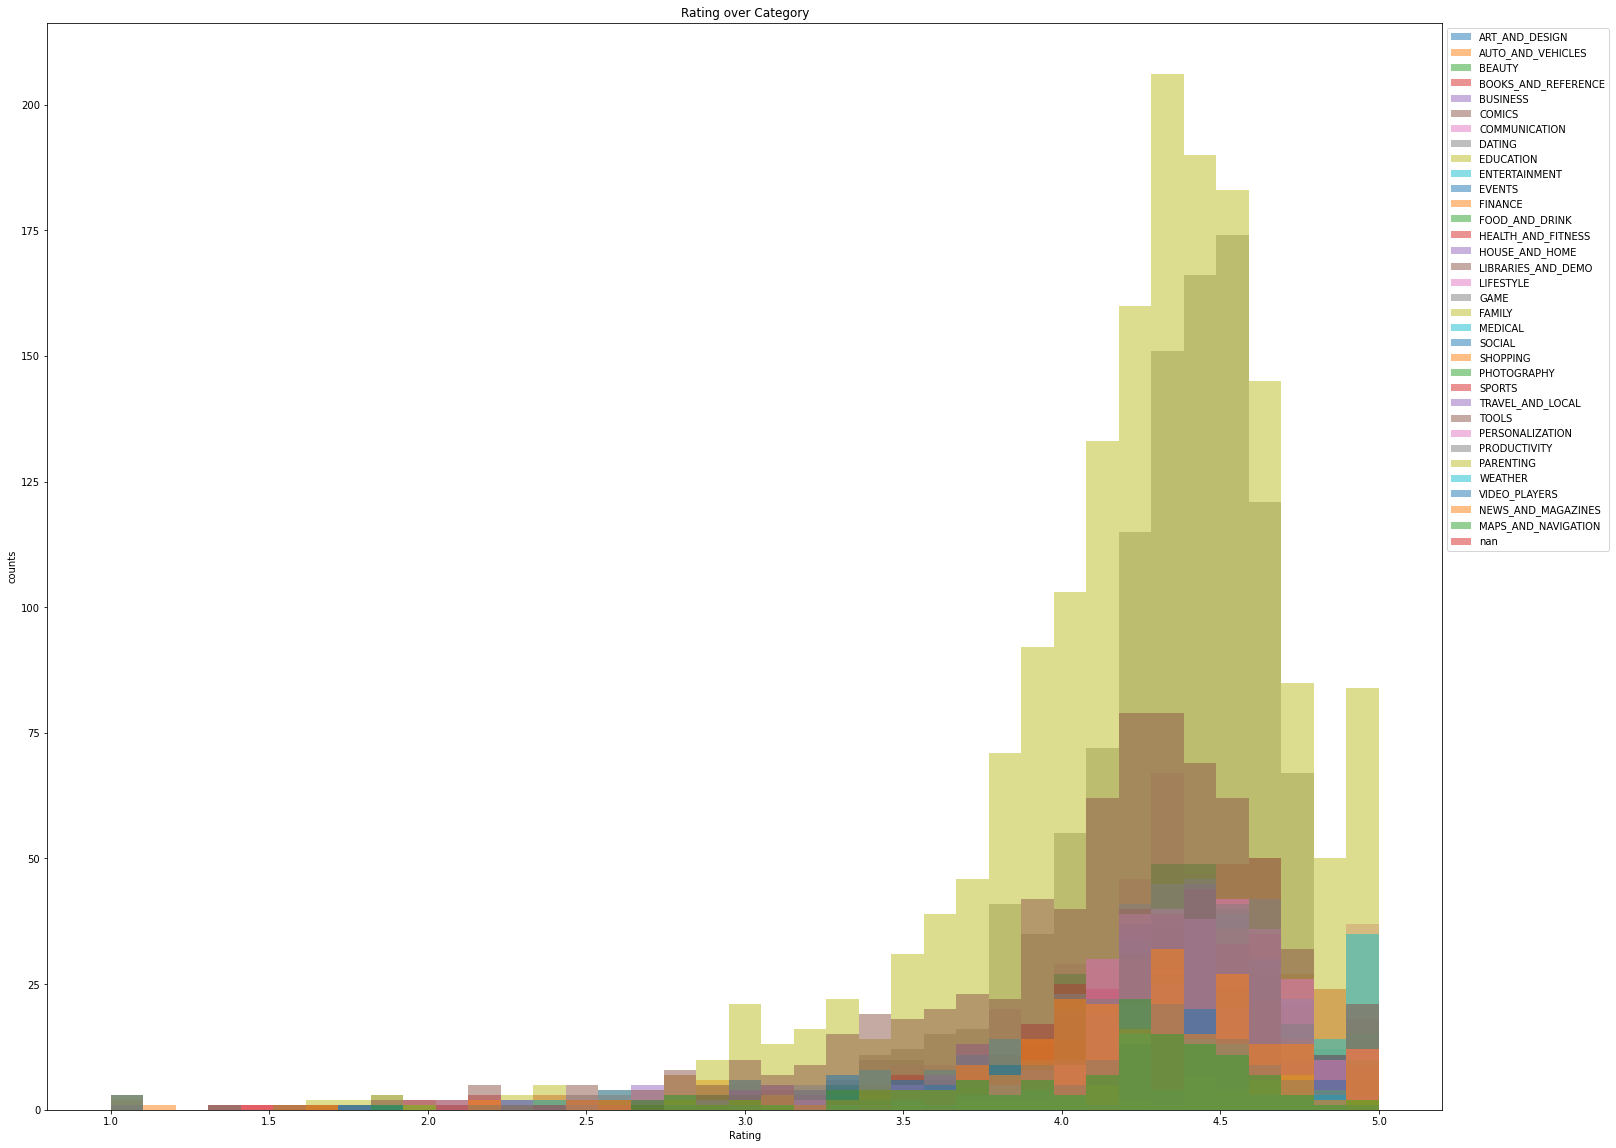

In [44]:
plt.figure(figsize=(25, 20))
categories = df['Category'].unique()
bin_range = (df['Rating'].min(),df['Rating'].max())
for i in categories:
    plt.hist(df[df['Category']==i]['Rating'],alpha=0.5,label=i,range=bin_range,bins=39)
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.ylabel('counts')
plt.xlabel('Rating')
plt.title('Rating over Category')
plt.savefig('/Users/xiongfengwang/git/data1030_student_f20/project/figures/Rating over Category.png')

## Data Processing

1. Discuss how you split the dataset and why.
2. Is your dataset IID?
3. Does it have group structure?
4. Is it a time series data?
5. How should you split the dataset given your ML question to best mimic future use when you deploy the model?
6. Apply MinMaxEncoder or StandardScaler on the continuous features
7. Apply OneHotEncoder or OrdinalEncoder on categorical features
8. Apply the LabelEncoder on the target variable if necessary.
9. Describe why you chose the preprocessor you used for each feature.
10. How many features do you have in the preprocessed data?

This is not an IID dataset because clearly there are group structures in the dataset: Category and Subcategory. Also this is not a time series dataset because even though for very small amout of Apps, there are samples for different version of it and the rating might vary, the porpotion is too small to be consider as a generl feature. Most of the Apps with different version only differ in number of reviews by around 1%.<br/>
Considering there are 8893 samples with a valid target features, the size of the data set is fair to apply a 8-1-1 split. Category with lowest counts is 42 for Beauty, 9 catogories' count below 100, and only 2 catogries' count above 800, so the 8-1-1 split is rational becasue we don't need to worry about group in train/test set should not apear in the other. We can implement plenty of n_split on the dataset.<br/>
Since there's an obvious group structure, I will choose GroupShuffleSplit to split the dataset. I choose GroupShuffleSplit over GroupKFold because the data set is also imbalance as we can see from the distribution of catrgories, or some other features. 

App: Key, no encoding<br/>
Category: Categorical, OneHotEncoder<br/>
Reviews: Numerical, StandardScaler<br/>
Size: Numerical, StandardScaler<br/>
Installs: Categorical, OrdinalEncoder<br/>
Type: Categorical, OneHotEncoder<br/>
Price: Numerical, StandardScaler<br/>
Content Rating: Categorical, OneHotEncoder<br/>
Genres: Categorical,dropped for new feature<br/>
Last Updated: Numerical,dropped for new feature<br/>
Current Ver: Categorical, dropped<br/>
Android Ver: Categorical, OneHotEncoder<br/>
Subcategory: Categorical, OneHotEncoder, on hold<br/>
Days: numerical, StandardScaler<br/>
Rating: Regression Target, StandardScaler<br/>

In [45]:
y = pd.DataFrame(df1['Rating'])
X = df1.loc[:, df1.columns != 'Rating']

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit

In [47]:
random_states = [i for i in range(10)]
for random_state in random_states:
    # split
    groups = df1['Category']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Category'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)

    #preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    print(X_train_prep[0:5])
    print("==========================================================")

    ss = StandardScaler()
    y_train_prep = ss.fit_transform(y_train)
    y_val_prep = ss.transform(y_val)
    y_test_prep = ss.transform(y_test)
    print('training set:', y_train.shape)
    print('training_prep set:', y_train_prep.shape)
    print(y_train_prep[0:5])

ValueError: Input contains NaN

In [49]:
df1.isnull().sum()

App                  0
Category             1
Rating               0
Reviews              0
Size              1468
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          4
Android Ver          2
Subcategory       8446
Days                 0
dtype: int64

In [48]:
df1.Subcategory.isnull().sum()

8446

## References

1. Gupta, L. (2019, February 03). Google Play Store Apps Dataset. Retrieved October 13, 2020, from https://www.kaggle.com/lava18/google-play-store-apps
2. Jemseow, J. (2018, September 27). Machine Learning to predict app ratings. Retrieved October 13, 2020, from https://www.kaggle.com/jemseow/machine-learning-to-predict-app-ratings
3. Siddiqi, S. (2018, September 28). Google Play Store Apps - Data Cleaning. Retrieved October 13, 2020, from https://www.kaggle.com/sabasiddiqi/google-play-store-apps-data-cleaning
4. Gupta, L. (2018, September 19). All that you need to know about the Android market. Retrieved October 13, 2020, from https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market
5. Jha, R. K. (2020, January 27). ML to Visualization &amp; Prediction of App Ratings. Retrieved October 13, 2020, from https://www.kaggle.com/rajeshjnv/ml-to-visualization-prediction-of-app-ratings

In [ ]:
df1.head()